In [ ]:
import zipfile
import os

# Define the path to the zip file in your Google Drive
zip_file_path = '/content/Dog_Breed_Classification.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Check the extracted files and folders
!ls /content/Dog_Breed_Classification


test  train


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = '/content/Dog_Breed_Classification/train'
test_dir = '/content/Dog_Breed_Classification/test'

Training set class distribution:
Beagle: 80
Boxer: 80
Rottweiler: 69
Yorkshire_Terrier: 80
Labrador_Retriever: 75
German_Shepherd: 76
Bulldog: 80
Dachshund: 76
Poodle: 80
Golden_Retriever: 71

Test set class distribution:
Beagle: 20
Boxer: 20
Rottweiler: 20
German_Sheperd: 20
Yorkshire_Terrier: 20
Labrador_Retriever: 20
Bulldog: 20
Dachshund: 20
Poodle: 20
Golden_Retriever: 20


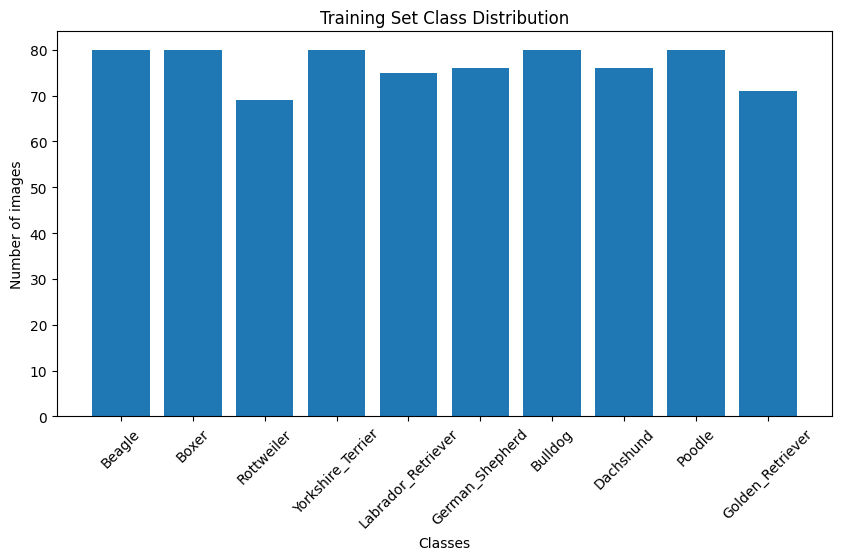

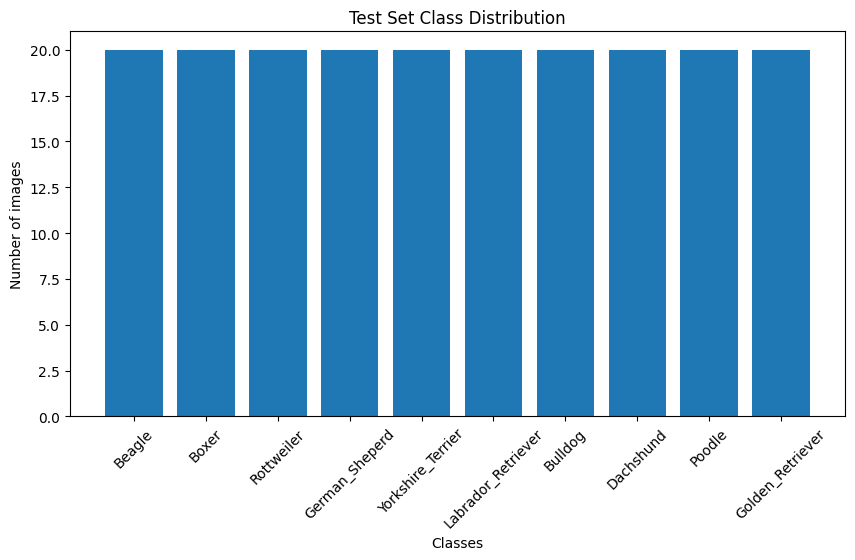

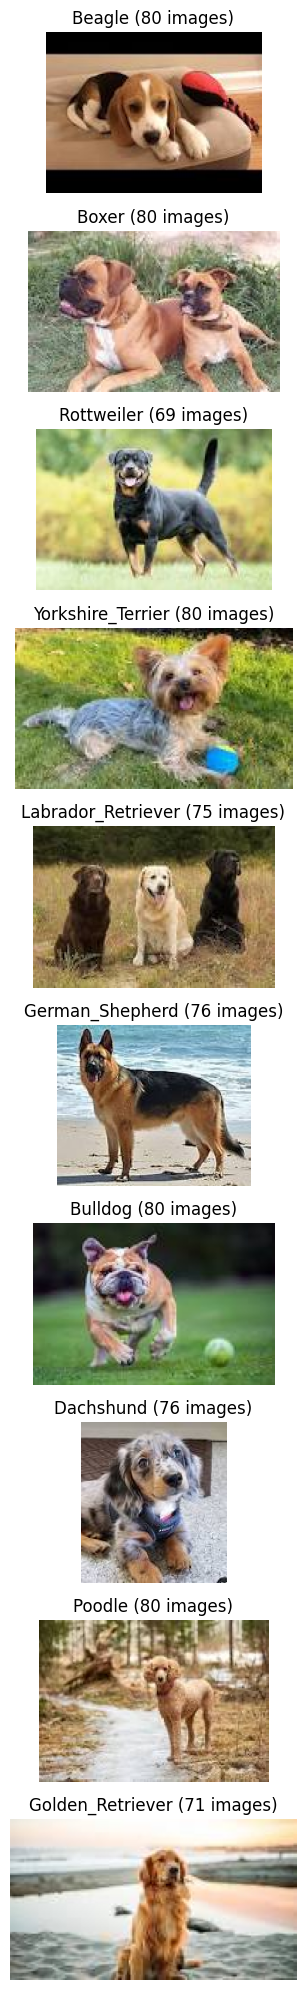

In [ ]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

# Function to count images in each class
def count_images(directory):
    class_counts = defaultdict(int)
    for root, dirs, files in os.walk(directory):
        for subdir in dirs:
            class_dir = os.path.join(root, subdir)
            count = len([file for file in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, file))])
            class_counts[subdir] = count
    return class_counts

# Function to plot class distribution
def plot_distribution(counts, title):
    plt.figure(figsize=(10, 5))
    plt.bar(counts.keys(), counts.values())
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of images')
    plt.xticks(rotation=45)
    plt.show()

# Function to display sample images from each class
def display_sample_images(directory, class_counts):
    n_classes = len(class_counts)
    plt.figure(figsize=(15, n_classes * 2))

    for i, (cls, count) in enumerate(class_counts.items()):
        class_dir = os.path.join(directory, cls)
        sample_image = random.choice([os.path.join(class_dir, img) for img in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, img))])
        img = Image.open(sample_image)
        plt.subplot(n_classes, 1, i+1)
        plt.imshow(img)
        plt.title(f"{cls} ({count} images)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Count images in train and test directories
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

print("Training set class distribution:")
for cls, count in train_counts.items():
    print(f"{cls}: {count}")

print("\nTest set class distribution:")
for cls, count in test_counts.items():
    print(f"{cls}: {count}")

# Plotting the distribution
plot_distribution(train_counts, 'Training Set Class Distribution')
plot_distribution(test_counts, 'Test Set Class Distribution')

# Display sample images from training set
display_sample_images(train_dir, train_counts)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set aside 20% for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Adjust the target size as needed
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Check class indices to ensure correct mapping
print(train_generator.class_indices)


Found 615 images belonging to 10 classes.
Found 152 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
{'Beagle': 0, 'Boxer': 1, 'Bulldog': 2, 'Dachshund': 3, 'German_Shepherd': 4, 'Golden_Retriever': 5, 'Labrador_Retriever': 6, 'Poodle': 7, 'Rottweiler': 8, 'Yorkshire_Terrier': 9}


# **CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Adjust number of classes dynamically
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)


Epoch 1/10
19/19 [==============================] - 45s 2s/step - loss: 2.5204 - accuracy: 0.1149 - val_loss: 2.2689 - val_accuracy: 0.1250
Epoch 2/10
19/19 [==============================] - 40s 2s/step - loss: 2.1888 - accuracy: 0.1921 - val_loss: 1.8982 - val_accuracy: 0.3906
Epoch 3/10
19/19 [==============================] - 41s 2s/step - loss: 1.8762 - accuracy: 0.3413 - val_loss: 1.7284 - val_accuracy: 0.3906
Epoch 4/10
19/19 [==============================] - 41s 2s/step - loss: 1.6413 - accuracy: 0.4185 - val_loss: 1.1879 - val_accuracy: 0.6797
Epoch 5/10
19/19 [==============================] - 41s 2s/step - loss: 1.3079 - accuracy: 0.5472 - val_loss: 0.9599 - val_accuracy: 0.7656
Epoch 6/10
19/19 [==============================] - 42s 2s/step - loss: 1.0094 - accuracy: 0.6364 - val_loss: 0.7363 - val_accuracy: 0.7344
Epoch 7/10
19/19 [==============================] - 49s 2s/step - loss: 0.7293 - accuracy: 0.7547 - val_loss: 0.4406 - val_accuracy: 0.8984
Epoch 8/10
19/19 [==

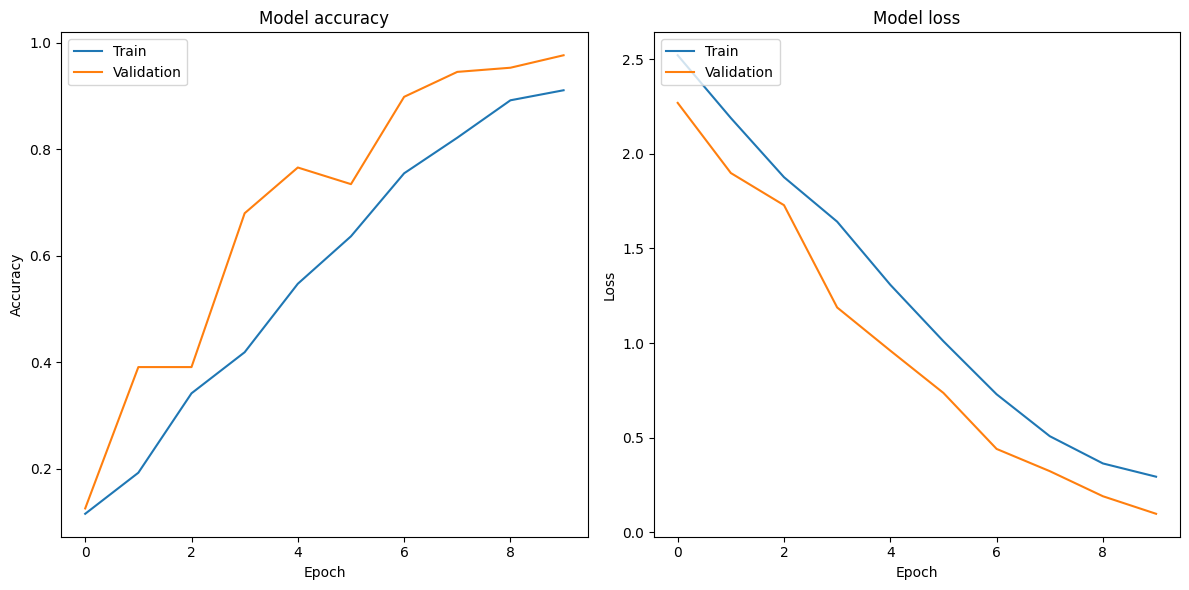

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


6/6 [==============================] - 4s 627ms/step - loss: 0.0523 - accuracy: 0.9792
Test accuracy: 0.9791666865348816
Test loss: 0.05226193368434906
6/6 [==============================] - 2s 389ms/step
Classification Report:
                    precision    recall  f1-score   support

            Beagle       0.05      0.05      0.05        20
             Boxer       0.11      0.12      0.11        17
           Bulldog       0.21      0.21      0.21        19
         Dachshund       0.00      0.00      0.00        20
    German_Sheperd       0.11      0.10      0.10        20
  Golden_Retriever       0.05      0.05      0.05        20
Labrador_Retriever       0.05      0.05      0.05        19
            Poodle       0.19      0.24      0.21        17
        Rottweiler       0.05      0.05      0.05        20
 Yorkshire_Terrier       0.12      0.10      0.11        20

          accuracy                           0.09       192
         macro avg       0.09      0.10      0.09 

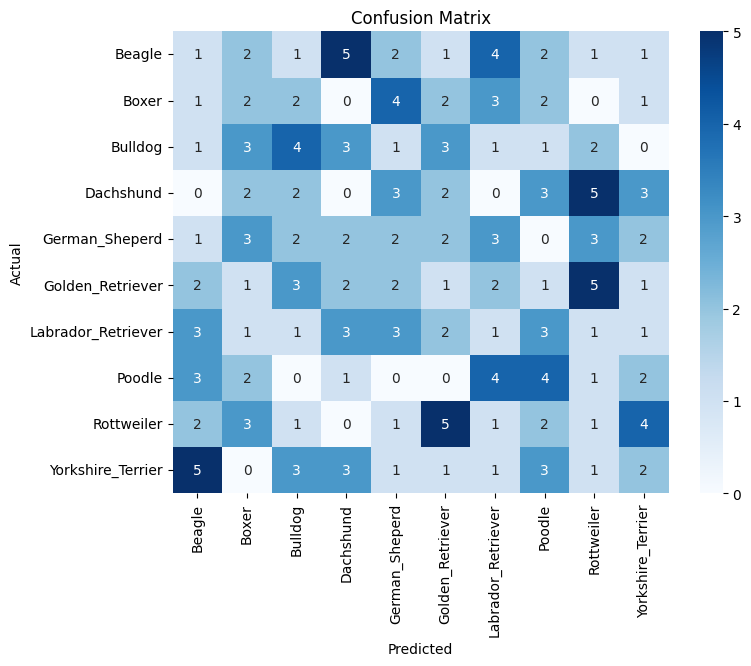

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# Get the predictions
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
y_pred = np.argmax(predictions, axis=1)

# Extract true labels from the generator
y_true = []
for i in range(test_generator.samples // test_generator.batch_size):
    images, labels = test_generator.next()
    for label in labels:
        y_true.append(np.argmax(label))

y_true = np.array(y_true)

# Now both y_true and y_pred should have the same length
# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


6/6 [==============================] - 4s 660ms/step


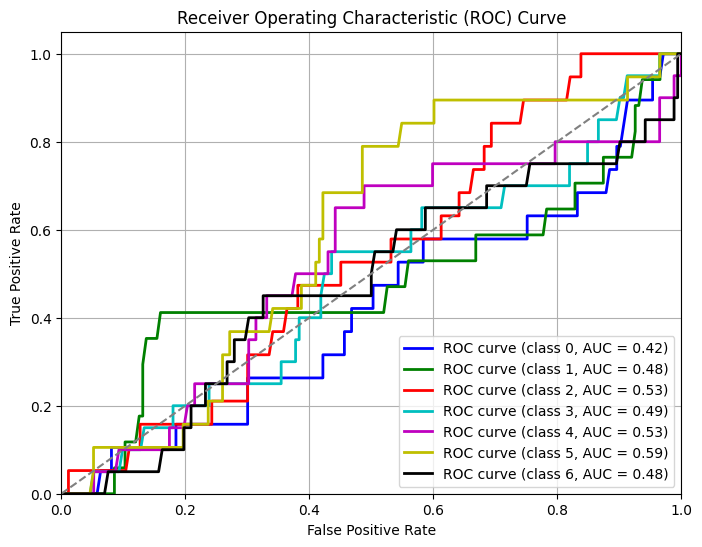

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Get the predictions (probabilities) from the model
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming predictions is of shape (number of samples, number of classes)
n_classes = predictions.shape[1]

# Extract true labels from the generator
y_true = []
for i in range(test_generator.samples // test_generator.batch_size):
    images, labels = test_generator.next()
    for label in labels:
        y_true.append(np.argmax(label))

y_true = np.array(y_true)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Adjust as per the number of classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


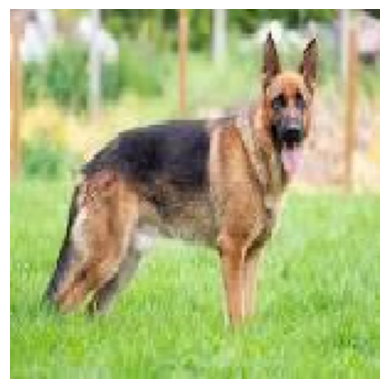

1/1 [==============================] - 0s 222ms/step
Predicted class: German_Shepherd


In [ ]:
from tensorflow.keras.preprocessing import image

# Path to your input image
image_path = '/content/Dog_Breed_Classification/test/German_Sheperd/German Shepherd_25.jpg'

# Load the image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)

# Expand dimensions to match batch size
img_array = np.expand_dims(img_array, axis=0)

# Preprocess image (normalize pixel values)
img_array = img_array / 255.0

# Display the image if needed
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict the class probabilities
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the predicted index to the class label
class_labels = list(train_generator.class_indices.keys())  # Assuming you have access to the class indices
predicted_class_label = class_labels[predicted_class_index]

print(f'Predicted class: {predicted_class_label}')


In [ ]:
model.save("dog_breed.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0
